Setting up

In [13]:
import numpy as np
import matplotlib.pyplot as plt

params_stable = {"A": 0.05, "beta": 0.01, "gamma": 0.03, "nu": 0.1, "mu": 0.1, "mu_star": 0.05}  # R0 < 1
params_unstable = {"A": 0.05, "beta": 0.05, "gamma": 0.03, "nu": 0.1, "mu": 0.1, "mu_star": 0.01}  # R0 > 1

R0_stable = params_stable["beta"] * params_stable["A"] * params_stable["gamma"] / (params_stable["nu"] * params_stable["mu"] * params_stable["mu_star"])
R0_unstable = params_unstable["beta"] * params_unstable["A"] * params_unstable["gamma"] / (params_unstable["nu"] * params_unstable["mu"] * params_unstable["mu_star"])

T0, T_star0, V0 = 20, 5, 1
t0, tf = 0, 100
h = 0.05           
N = int((tf - t0) / h)

t_values = np.linspace(t0, tf, N+1)

In [14]:
def f1(t, T, T_star, V, params):
    return params["A"] - params["beta"] * T * V - params["mu"] * T

def f2(t, T, T_star, V, params):
    return params["beta"] * T * V - params["mu_star"] * T_star

def f3(t, T, T_star, V, params):
    return params["gamma"] * T_star - params["nu"] * V

# Runge-Kutta 2nd Order Method (RK2)
def rk2_step(t, T, T_star, V, h, params):
    k1_T = h * f1(t, T, T_star, V, params)
    k1_T_star = h * f2(t, T, T_star, V, params)
    k1_V = h * f3(t, T, T_star, V, params)
    
    T_mid = T + k1_T / 2
    T_star_mid = T_star + k1_T_star / 2
    V_mid = V + k1_V / 2
    
    k2_T = h * f1(t + h/2, T_mid, T_star_mid, V_mid, params)
    k2_T_star = h * f2(t + h/2, T_mid, T_star_mid, V_mid, params)
    k2_V = h * f3(t + h/2, T_mid, T_star_mid, V_mid, params)
    
    T_next = T + k2_T
    T_star_next = T_star + k2_T_star
    V_next = V + k2_V
    
    return T_next, T_star_next, V_next

# Euler's Method
def euler_step(t, T, T_star, V, h, params):
    T_next = T + h * f1(t, T, T_star, V, params)
    T_star_next = T_star + h * f2(t, T, T_star, V, params)
    V_next = V + h * f3(t, T, T_star, V, params)
    
    return T_next, T_star_next, V_next

RK when R0 > 1 and R0 < 1

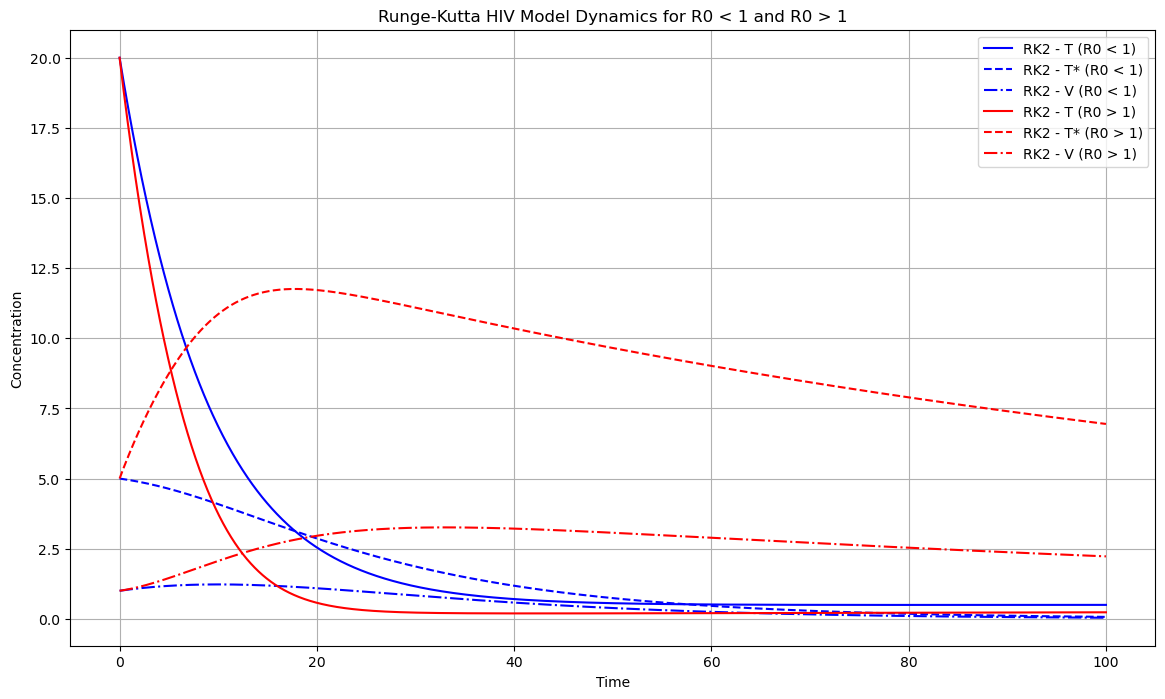

In [15]:
# R0 < 1
plt.figure(figsize=(14, 8))
T_values_rk2_stable = np.zeros(N+1)
T_star_values_rk2_stable = np.zeros(N+1)
V_values_rk2_stable = np.zeros(N+1)

T_values_rk2_stable[0], T_star_values_rk2_stable[0], V_values_rk2_stable[0] = T0, T_star0, V0   # Initial conditions for RK2 (R0 < 1)
for i in range(N):
    T_values_rk2_stable[i+1], T_star_values_rk2_stable[i+1], V_values_rk2_stable[i+1] = rk2_step(
        t_values[i], T_values_rk2_stable[i], T_star_values_rk2_stable[i], V_values_rk2_stable[i], h, params_stable
    )

plt.plot(t_values, T_values_rk2_stable, 'b-', label=f"RK2 - T (R0 < 1)")
plt.plot(t_values, T_star_values_rk2_stable, 'b--', label=f"RK2 - T* (R0 < 1)")
plt.plot(t_values, V_values_rk2_stable, 'b-.', label=f"RK2 - V (R0 < 1)")

# R0 > 1
T_values_rk2_unstable = np.zeros(N+1)
T_star_values_rk2_unstable = np.zeros(N+1)
V_values_rk2_unstable = np.zeros(N+1)

T_values_rk2_unstable[0], T_star_values_rk2_unstable[0], V_values_rk2_unstable[0] = T0, T_star0, V0

for i in range(N):
    T_values_rk2_unstable[i+1], T_star_values_rk2_unstable[i+1], V_values_rk2_unstable[i+1] = rk2_step(
        t_values[i], T_values_rk2_unstable[i], T_star_values_rk2_unstable[i], V_values_rk2_unstable[i], h, params_unstable
    )

plt.plot(t_values, T_values_rk2_unstable, 'r-', label=f"RK2 - T (R0 > 1)")
plt.plot(t_values, T_star_values_rk2_unstable, 'r--', label=f"RK2 - T* (R0 > 1)")
plt.plot(t_values, V_values_rk2_unstable, 'r-.', label=f"RK2 - V (R0 > 1)")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Runge-Kutta HIV Model Dynamics for R0 < 1 and R0 > 1")
plt.legend(loc='upper right')
plt.grid()
plt.show()

RK vs Euler for R0 < 1

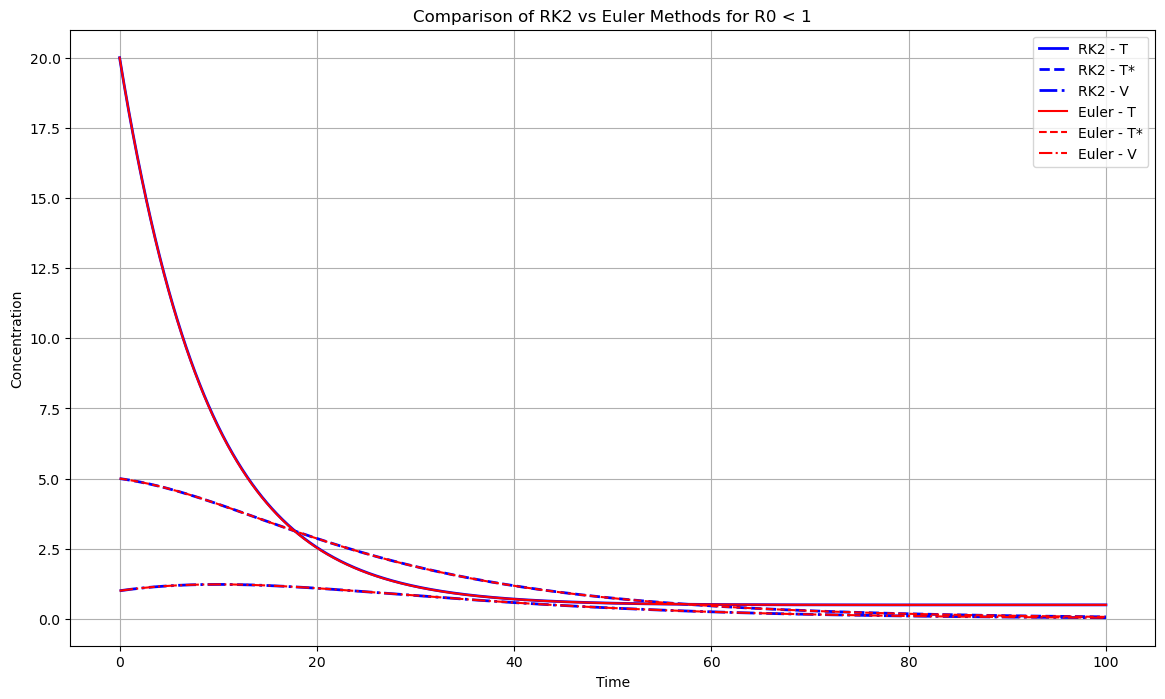

In [16]:
plt.figure(figsize=(14, 8))

T_values_euler = np.zeros(N+1)
T_star_values_euler = np.zeros(N+1)
V_values_euler = np.zeros(N+1)
T_values_euler[0], T_star_values_euler[0], V_values_euler[0] = T0, T_star0, V0

for i in range(N):
    T_values_euler[i+1], T_star_values_euler[i+1], V_values_euler[i+1] = euler_step(
        t_values[i], T_values_euler[i], T_star_values_euler[i], V_values_euler[i], h, params_stable
    )

plt.plot(t_values, T_values_rk2_stable, 'b-', label="RK2 - T",  linewidth = 2)
plt.plot(t_values, T_star_values_rk2_stable, 'b--', label="RK2 - T*", linewidth = 2)
plt.plot(t_values, V_values_rk2_stable, 'b-.', label="RK2 - V",  linewidth = 2)

plt.plot(t_values, T_values_euler, 'r-', label="Euler - T")
plt.plot(t_values, T_star_values_euler, 'r--', label="Euler - T*")
plt.plot(t_values, V_values_euler, 'r-.', label="Euler - V")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Comparison of RK2 vs Euler Methods for R0 < 1")
plt.legend(loc='upper right')
plt.grid()
plt.show()